In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import coordinates_functions as cf
import laspy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D



In [2]:
#Real world coordinates for GCPs

# Define the wheel variable
wheel = 0.3  # replace this with the actual value for wheel

# Define the points with height adjustment
points_rd = [
    # ("real1", 72560.689, 451585.030, 2.837 - wheel),
    # ("real2", 72430.207, 451376.846, 5.540 - wheel),
    # ("real3", 72404.804, 451496.345, 2.532 - wheel),
    ("real4", 72503.475, 451753.970, 2.490 - wheel),
    ("real5", 72518.993, 451923.906, 2.516 - wheel),
    ("real6", 72491.774, 451918.553, 2.494 - wheel),
    ("real7", 72445.762, 451871.248, 2.481 - wheel),
    ("real8", 72471.915, 451936.434, 2.783 - wheel),
    ("real9", 72517.762, 451983.216, 3.685 - wheel),
    ("real10", 72476.739, 451991.085, 5.506 - wheel),
]
# Extract only the numerical values (skip the first index with identifiers)
points_rd_array = np.array([point[1:] for point in points_rd]) #Easting, Northing, Height

# Display the array
print(points_rd_array)

# Convert points to WGS84
points_wgs84 = cf.convert_rd_to_wgs84(points_rd_array)
points_wgs84_array = np.array(points_wgs84)

[[7.25034750e+04 4.51753970e+05 2.19000000e+00]
 [7.25189930e+04 4.51923906e+05 2.21600000e+00]
 [7.24917740e+04 4.51918553e+05 2.19400000e+00]
 [7.24457620e+04 4.51871248e+05 2.18100000e+00]
 [7.24719150e+04 4.51936434e+05 2.48300000e+00]
 [7.25177620e+04 4.51983216e+05 3.38500000e+00]
 [7.24767390e+04 4.51991085e+05 5.20600000e+00]]


/Users/isabelslingerland/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/isabelslingerland/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/isabelslingerland/Documents/master AES/2nd_year/Q1/SandEngine_Depth-1/Thomas/coordinates_functions.py:13: FutureWarning: This function is deprecated. See: https://py

In [3]:
#test image coordinates
cf.get_image_coordinates('c9.jpg', 450, 355)

In [4]:
# Image coordinates for GCPs


im1= np.array([450,  355])
im2 = np.array([1300,  255])
im3= np.array([1535,  315])
im4 = np.array([911,538]) 
im5 =  np.array([525,1073])
im6 = np.array([1181,1032])
im7 = np.array([1943,808])
im8 = np.array([1732,1138])
im9 = np.array([338,1652])
im10 = np.array([2058,1644])

image_points = np.array([im4,
                         im5,
                        im6,
                        im7,
                        im8,
                        im9,
                        im10
                         
                        ])



$$
x' =  p_{11}X + p_{12}Y + p_{13}Z + p_{14}
$$

$$
y' = p_{21}X + p_{22}Y + p_{23}Z + p_{24}

$$

$$
1=  (p_{31}X + p_{32}Y + p_{33}Z + p_{34})
$$



System of equations $A \mathbf{p} = \mathbf{b}
$

unknown vector 

p is

$$
\mathbf{p} = \begin{bmatrix} 
p_{11} \\ 
p_{12} \\ 
p_{13} \\ 
p_{14} \\ 
p_{21} \\ 
p_{22} \\ 
p_{23} \\ 
p_{24} \\ 
p_{31} \\ 
p_{32} \\ 
p_{33} \\ 
p_{34} 
\end{bmatrix}
$$

$$
A = \begin{bmatrix}
X_1 & Y_1 & Z_1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0& 0 \\
0 & 0 & 0 & 0 & X_1 & Y_1 & Z_1 & 1 & 0 & 0& 0& 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & X_1 & Y_1 & Z_1 & 1\\

\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
X_{10} & Y_{10} & Z_{10} & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0& 0 \\
0 & 0 & 0 & 0 & X_{10} & Y_{10} & Z_{10} & 1 & 0 & 0& 0& 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & X_{10} & Y_{10} & Z_{10} & 1\\
\end{bmatrix}
$$

$$
\mathbf{b} = \begin{bmatrix} 
x_1' \\ 
y_1' \\ 
1 \\
\vdots \\ 
x_{10}' \\ 
y_{10}' \\ 
1 \\
\end{bmatrix}
$$

least squares to find unknown vector P


In [5]:
#create projection matrix
P = cf.compute_projection_matrix(points_rd_array, image_points)
print(P)


[[-2.32775218e+01 -7.40731684e-01  2.01671234e+02  2.02278971e+06]
 [ 2.65659618e+00  3.53751438e+00  1.34155948e+02 -1.79047177e+06]
 [ 1.35061962e-11 -2.21753171e-12 -6.40875518e-10  1.00000005e+00]]


In [6]:
# Test the projection matrix with our measured GCP 

testourGPC_EN = P @ np.array([72475.981, 451891.294, 2.194, 1])
testourGPC_EN_int = testourGPC_EN.astype(int)


In [9]:
#test bonus gcp
cf.get_image_coordinates('c9.jpg', testourGPC_EN_int[0], testourGPC_EN_int[1])

In [7]:
#test all GCPs
points_and_one = np.hstack((points_rd_array, np.ones((points_rd_array.shape[0], 1))))
print(points_and_one.shape)
estimated_pixel = (P@ points_and_one.T).T

#compute the error

residual = image_points - estimated_pixel[:, :1]


(7, 4)


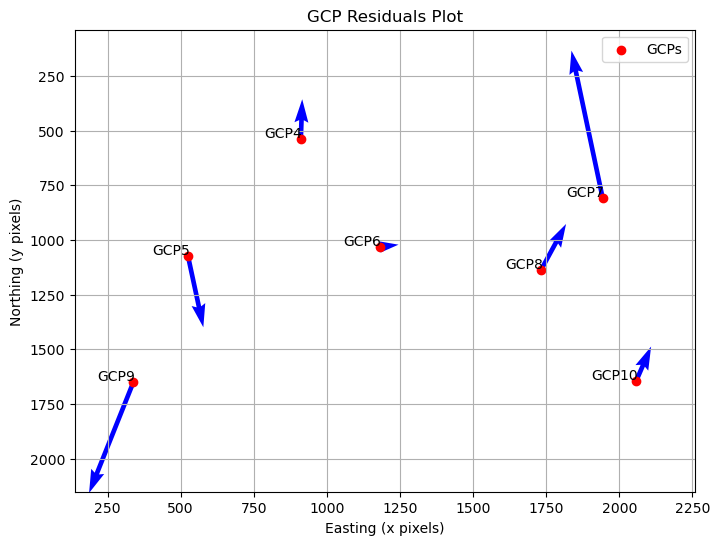

In [8]:

# Example usage plot_gcp_residuals
cf.plot_gcp_residuals(image_points, residual,200, 500, 'GCP Residuals Plot', 'Easting (x pixels)', 'Northing (y pixels)', 2, (8, 6))


 


In [2]:
# can also be installed using pip here
!python -m pip install laspy[laszip] numpy py4dgeo matplotlib scipy pyproj

zsh:1: no matches found: laspy[laszip]


In [9]:
# read a point cloud
laz_file = 'aoi5030.las'
with laspy.open(laz_file) as f_laz:
        laz = f_laz.read()
        xyz = laz.xyz # read the xyz values from the point cloud
        # there is way more to get here like classification, rgb, info 
        rgb = np.vstack((laz.red, laz.green, laz.blue)).T
        # CRS 
        crs = laz.header.parse_crs()

In [10]:
#get lidar coordinates
lidar_points = np.hstack((xyz, np.ones((xyz.shape[0], 1))))
print(lidar_points[0,:].shape)
# Project points using the projection matrix P
projected_points = P @ lidar_points.T  

x_prime = projected_points[0] / projected_points[2]
y_prime = projected_points[1] / projected_points[2]
    
# Stack the results to create an Nx2 array of image coordinates
image_coordinates = np.vstack((x_prime, y_prime)).T
    



(4,)


In [ ]:
grid = cf.create_coordinate_grid(image_coordinates, lidar_points, resolution=10)
argus_tower= np.array([72502.827	,452071.438	,  14.959, 1])
grid, min_distances = cf.create_distance_grid(image_coordinates, lidar_points, argus_tower, resolution=10)

In [143]:
#Optimised code for grid processing

# Define the grid boundaries with 10-pixel steps
min_E, max_E = np.min(image_coordinates[:, 0]), np.max(image_coordinates[:, 0])
min_N, max_N = np.min(image_coordinates[:, 1]), np.max(image_coordinates[:, 1])
resolution = 5
easting_bins = np.arange(min_E, max_E + resolution, resolution)
northing_bins = np.arange(min_N, max_N + resolution, resolution)

# Digitize image coordinates to find which grid cell each point belongs to
easting_indices = np.digitize(image_coordinates[:, 0], easting_bins) - 1
northing_indices = np.digitize(image_coordinates[:, 1], northing_bins) - 1

# Initialize a dictionary to store the points in each grid box
grid = {}

# Process each point and assign it to the corresponding grid cell
for idx in range(len(image_coordinates)):
    i, j = northing_indices[idx], easting_indices[idx]  # Grid cell indices
    
    # Skip if out of bounds
    if i < 0 or i >= len(northing_bins) - 1 or j < 0 or j >= len(easting_bins) - 1:
        continue
    
    # Create the grid cell key
    grid_key = (i, j)
    
    # Initialize the cell if it doesn't exist
    if grid_key not in grid:
        grid[grid_key] = {'image_coordinates': [], 'real_coordinates': []}
    
    # Append the image and real coordinates to the appropriate cell
    grid[grid_key]['image_coordinates'].append(image_coordinates[idx])
    grid[grid_key]['real_coordinates'].append(lidar_points[idx])

# Convert lists to arrays for each grid cell
for key in grid:
    grid[key]['image_coordinates'] = np.array(grid[key]['image_coordinates'])
    grid[key]['real_coordinates'] = np.array(grid[key]['real_coordinates'])

print("Grid processing complete.")


Grid processing complete.


In [144]:
argus_tower= np.array([72502.827	,452071.438	,  14.959, 1])


# Define your distance function (assuming Euclidean distance)
def distance(coord1, coord2):
    return np.linalg.norm(coord1 - coord2)

# Dictionary to store the minimum distance for each grid cell
min_distances = {}

# Iterate through each cell in the grid
for key, value in grid.items():
    if len(value['real_coordinates']) > 0:  # Only consider non-empty cells
        # Calculate distances to Argus Tower for each real coordinate in the cell
        distances = [distance(real_coord, argus_tower) for real_coord in value['real_coordinates']]
        
        # Find the minimum distance for this grid cell
        min_distance = min(distances)
        
        # Store the minimum distance in the dictionary
        min_distances[key] = min_distance

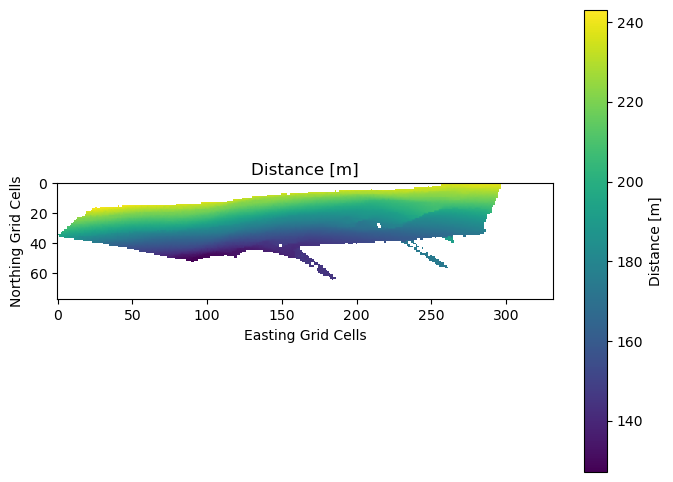

In [145]:
#Display the distance map

# Define the grid dimensions
num_rows = len(northing_bins) - 1  # Number of rows in the grid
num_cols = len(easting_bins) - 1   # Number of columns in the grid

# Initialize a 2D array to store the minimum distances for each grid cell
# distance_grid = np.full((num_rows, num_cols), np.nan)  # Use NaN to indicate empty cells
distance_grid = np.full(easting_grid.shape, np.nan) 
# Fill the distance grid with minimum distances from the min_distances dictionary
for (i, j), min_distance in min_distances.items():
    distance_grid[i, j] = min_distance  # Assign the minimum distance to the appropriate cell

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(distance_grid, cmap='viridis', origin='upper')  # 'viridis' is a perceptually uniform colormap
plt.colorbar(label='Distance [m]')
plt.title("Distance [m]")
plt.xlabel("Easting Grid Cells")
plt.ylabel("Northing Grid Cells")
plt.savefig('Distancemap_new.png')
# Display the image
plt.show()
